In [1]:
import roboticstoolbox as rtb
%matplotlib widget
robot = rtb.models.Panda()
print(robot)



ERobot: panda (by Franka Emika), 7 joints (RRRRRRR), 1 gripper, geometry, collision
┌──────┬──────────────┬───────┬─────────────┬────────────────────────────────────────────────┐
│ link │     link     │ joint │   parent    │              ETS: parent to link               │
├──────┼──────────────┼───────┼─────────────┼────────────────────────────────────────────────┤
│    0 │ panda_link0  │       │ BASE        │ SE3()                                          │
│    1 │ panda_link1  │     0 │ panda_link0 │ SE3(0, 0, 0.333) ⊕ Rz(q0)                      │
│    2 │ panda_link2  │     1 │ panda_link1 │ SE3(-90°, -0°, 0°) ⊕ Rz(q1)                    │
│    3 │ panda_link3  │     2 │ panda_link2 │ SE3(0, -0.316, 0; 90°, -0°, 0°) ⊕ Rz(q2)       │
│    4 │ panda_link4  │     3 │ panda_link3 │ SE3(0.0825, 0, 0; 90°, -0°, 0°) ⊕ Rz(q3)       │
│    5 │ panda_link5  │     4 │ panda_link4 │ SE3(-0.0825, 0.384, 0; -90°, -0°, 0°) ⊕ Rz(q4) │
│    6 │ panda_link6  │     5 │ panda_link5 │ SE3(90°, -0°, 0

In [2]:
Te = robot.fkine(robot.qr)  # forward kinematics
print(Te)



   0.995     0         0.09983   0.484     
   0        -1         0         0         
   0.09983   0        -0.995     0.4126    
   0         0         0         1         



In [3]:
from spatialmath import SE3

Tep = SE3.Trans(0.6, -0.3, 0.1) * SE3.OA([0, 1, 0], [0, 0, -1])
sol = robot.ik_LM(Tep)         # solve IK
print(sol)

(array([-1.16511893,  0.89595936,  0.84120286, -1.67560083, -0.79858732,
        2.19316718, -2.37210578]), 1, 134, 7, 3.163221062516321e-12)


In [4]:
q_pickup = sol[0]
print(robot.fkine(q_pickup)) 

  -1         1.201e-06 -1.421e-06  0.6       
   1.201e-06  1         5.951e-07 -0.3       
   1.421e-06  5.951e-07 -1         0.1       
   0         0         0         1         



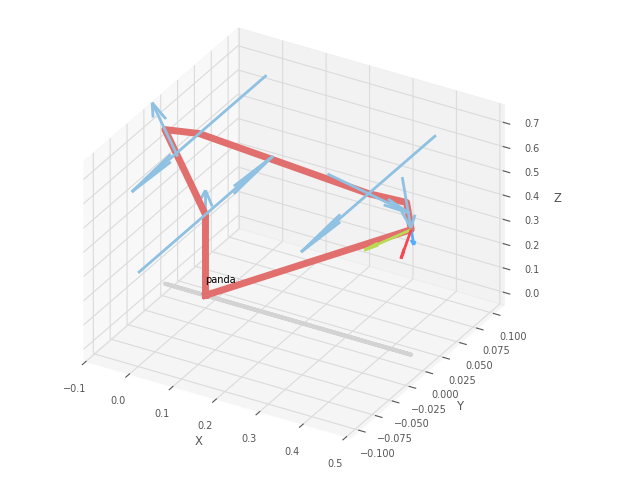

PyPlot3D backend, t = 2.499999999999999, scene:
  robot: Text(0.0, 0.0, 'panda')

In [5]:
qt = rtb.jtraj(robot.qr, q_pickup, 50)
robot.plot(qt.q, backend='pyplot', movie='panda1.gif')

In [ ]:
robot.plot(qt.q)

Exception in thread Thread-4:
Traceback (most recent call last):
  File "C:\Users\MateoAlmeida\AppData\Local\Programs\Python\Python39\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "c:\Users\MateoAlmeida\Desktop\10mo\robotic\repository\robotic\roboticDevelopEnv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\MateoAlmeida\AppData\Local\Programs\Python\Python39\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\MateoAlmeida\Desktop\10mo\robotic\repository\robotic\roboticDevelopEnv\lib\site-packages\swift\SwiftRoute.py", line 296, in __init__
    start_server = websockets.serve(self.serve, "localhost", port)
  File "c:\Users\MateoAlmeida\Desktop\10mo\robotic\repository\robotic\roboticDevelopEnv\lib\site-packages\websockets\asyncio\server.py", line 743, in __init__
    self.server = Server(
  File "c:\Users\MateoAlmeida\Desktop\10mo\robotic\repository\